In [109]:
import pandas as pd

In [110]:
#read the dataset
data=pd.read_csv("sales_data_with_discounts.csv")

In [124]:
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [112]:
#finding the numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [128]:
#numerical_columns
num_col=data.select_dtypes(include=['float64', 'int64']).columns

In [122]:
#renaming columns
data.rename(columns={'Avg Price':'Avg_Price','Total Sales Value':'Total_Sales_Value','Discount Rate (%)':'Discount_Rate',	
                        'Discount Amount':'Discount_Amount','Net Sales Value':'Net_Sales_Value'},inplace=True)

In [130]:
stats= data[num_col].agg(['std','mean','median',lambda x:x.mode()[0]])
stats.loc['mode']=stats.loc['<lambda>']
stats.drop('<lambda>',inplace=True)
stats

,Volume,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
mode,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801


Volume:The average Volume is 5,with a standard deviation 4.23,median as 4 and mode is 3.
Avg Price:The average of Avg_Price is 10453.4, with standard deviation 18079.9,median as 1450 and mode is 400.
Total Sales Value:The average of Toatal Sales Value is 33812.8, with standard deviation 50535,median as 5700 and mode is 24300.
Discount Rate(%):The average of Discount Rate is 15.15, with standard deviation 4.22,median as 16.57 and mode is 5.
Discount Amount:The average of Discount Amount is 3346.4, with standard deviation 4509.9,median as 988.9 and mode is 69.1 .
Net Sales Value:The average of Net Sales Value is 30466.3, with standard deviation 46358.6,median as 4677.7 and mode is 326.9 .

In [ ]:
import matplotlib.pyplot as plt

(array([2., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([  326.97480055,  4930.14298291,  9533.31116526, 14136.47934761,
        18739.64752996, 23342.81571231, 27945.98389466, 32549.15207701,
        37152.32025936, 41755.48844172, 46358.65662407]),
 <BarContainer object of 10 artists>)

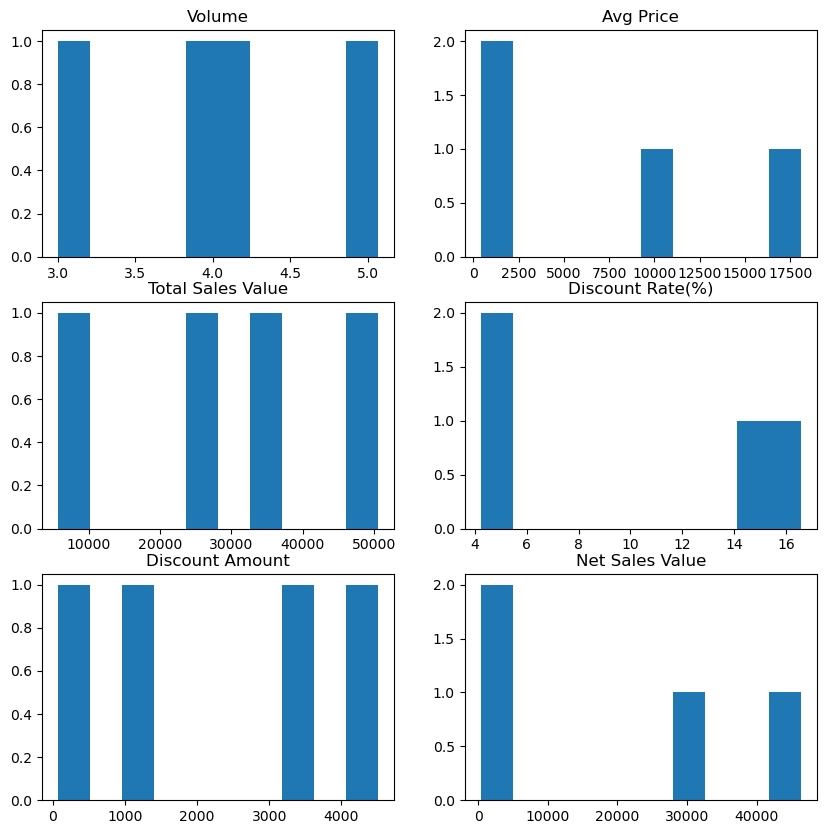

In [132]:
#histograms for numerical columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].set_title('Volume')
ax[0,0].hist(stats['Volume'])
ax[0,1].set_title('Avg Price')
ax[0,1].hist(stats['Avg_Price'])
ax[1,0].set_title('Total Sales Value')
ax[1,0].hist(stats['Total_Sales_Value'])
ax[1,1].set_title('Discount Rate(%)')
ax[1,1].hist(stats['Discount_Rate'])
ax[2,0].set_title('Discount Amount')
ax[2,0].hist(stats['Discount_Amount'])
ax[2,1].set_title('Net Sales Value')
ax[2,1].hist(stats['Net_Sales_Value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x197764a2310>,
 'caps': [<matplotlib.lines.Line2D at 0x197764a3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19776494050>],
 'medians': [<matplotlib.lines.Line2D at 0x197764ad090>],
 'fliers': [<matplotlib.lines.Line2D at 0x197764adb50>],
 'means': []}

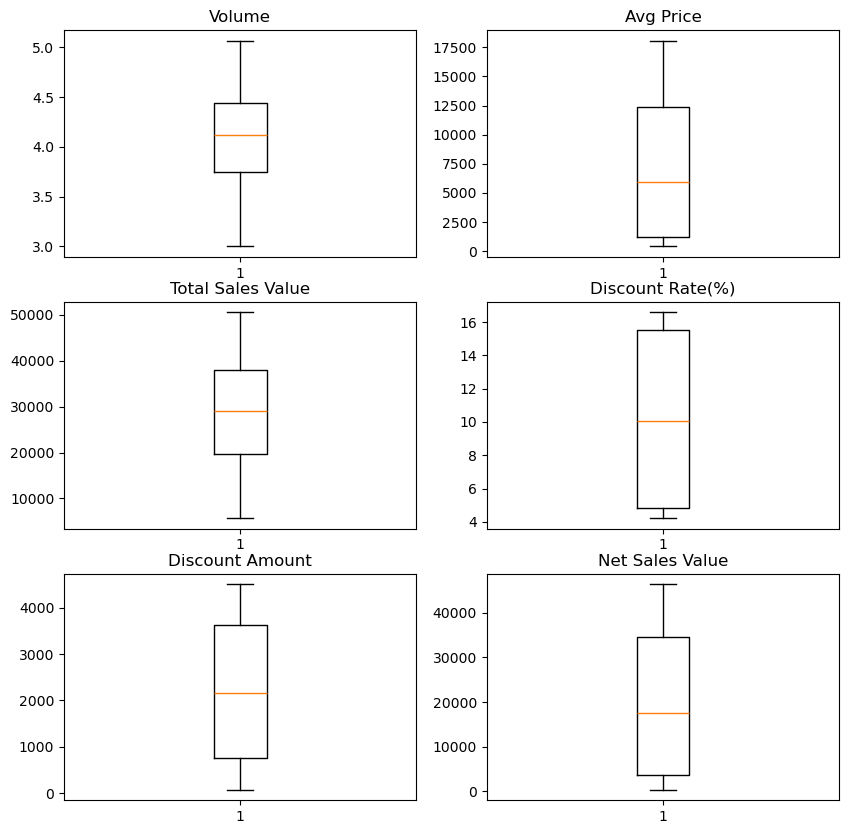

In [134]:
#boxplots for numerical columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].set_title('Volume')
ax[0,0].boxplot(stats['Volume'])
ax[0,1].set_title('Avg Price')
ax[0,1].boxplot(stats['Avg_Price'])
ax[1,0].set_title('Total Sales Value')
ax[1,0].boxplot(stats['Total_Sales_Value'])
ax[1,1].set_title('Discount Rate(%)')
ax[1,1].boxplot(stats['Discount_Rate'])
ax[2,0].set_title('Discount Amount')
ax[2,0].boxplot(stats['Discount_Amount'])
ax[2,1].set_title('Net Sales Value')
ax[2,1].boxplot(stats['Net_Sales_Value'])

In [136]:
#categorical columns
cat_col=data.select_dtypes(include=['object']).columns
cat_col

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

<Axes: xlabel='Date'>

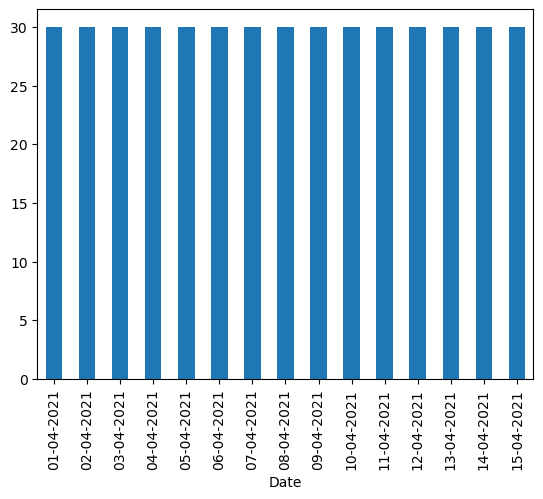

In [138]:
data['Date'].value_counts().plot(kind='bar')

All dates are having good sales

<Axes: xlabel='Day'>

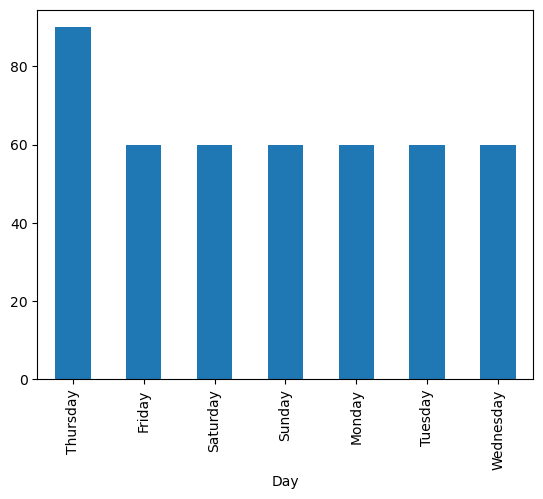

In [156]:
data['Day'].value_counts().plot(kind='bar')

Most Sales are done in Thursdays and remaining days is constant sales

<Axes: xlabel='SKU'>

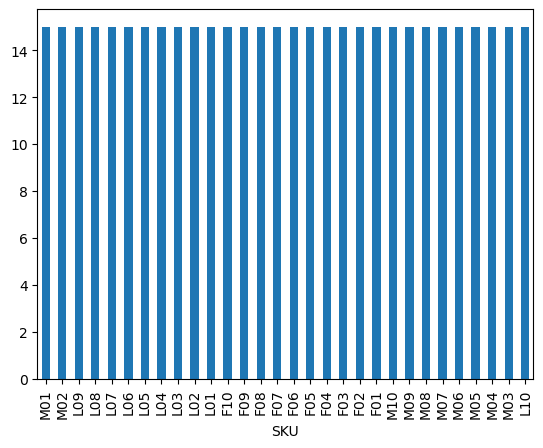

In [154]:
data['SKU'].value_counts().plot(kind='bar')

Every SKU is having equal sales

<Axes: xlabel='City'>

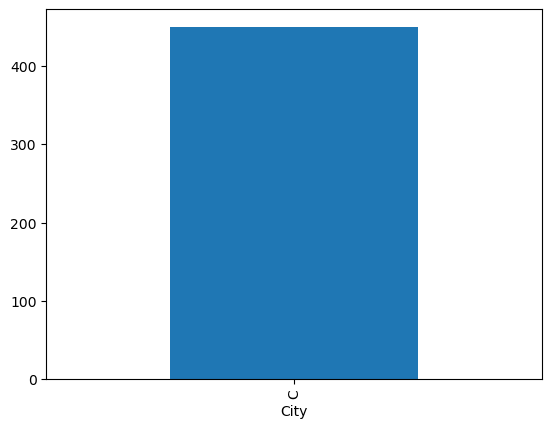

In [152]:
data['City'].value_counts().plot(kind='bar')

All the sales are done in Only one City 

<Axes: xlabel='BU'>

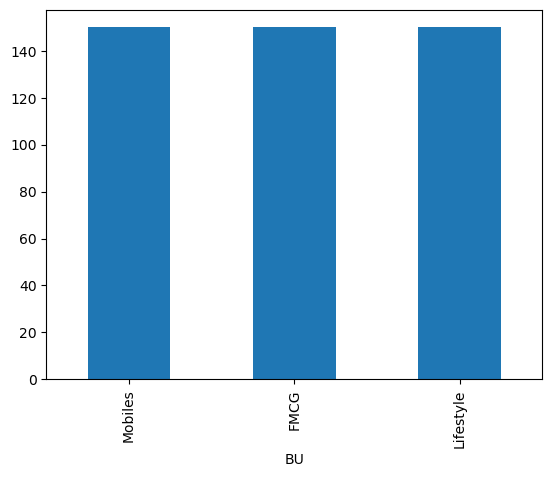

In [150]:
data['BU'].value_counts().plot(kind='bar')

These Mobiles , FMCG and Lifestyle products are equally sold 

<Axes: xlabel='Brand'>

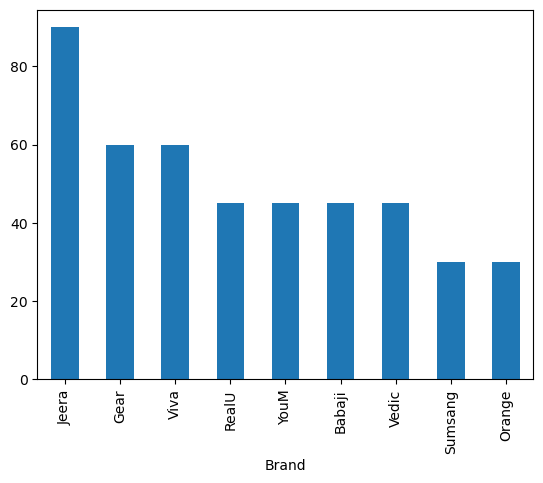

In [148]:
data['Brand'].value_counts().plot(kind='bar')

Jeera Brand is have high sales.
Gear and Viva are mostly sold after Jeera.
RealU,YouM,Babaji and Vedic are moderately saled.
Sumsang and Orange Brands are sold less compared to other Brands.

<Axes: xlabel='Model'>

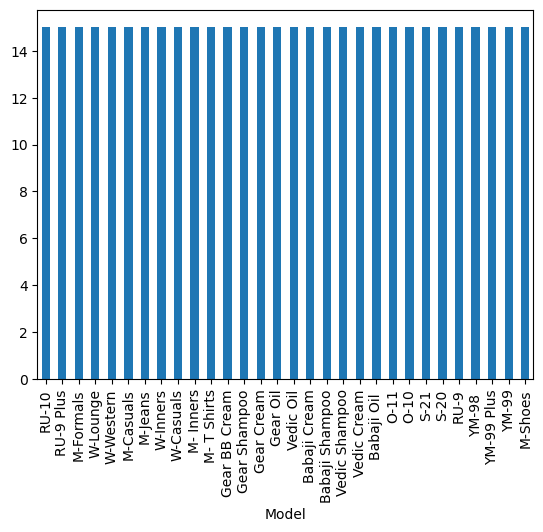

In [146]:
data['Model'].value_counts().plot(kind='bar')

Atmost all Models are getting good value and sales

In [144]:
from sklearn.preprocessing import StandardScaler

In [142]:
#standardization
scaler=StandardScaler()
Standardized= pd.DataFrame(scaler.fit_transform(data[num_col]), columns=num_col)
print('Before Standardization')
print(data[num_col].describe())

print('After Standardization')
print(Standardized.describe())

Before Standardization
           Volume     Avg_Price  Total_Sales_Value  Discount_Rate  \
count  450.000000    450.000000         450.000000     450.000000   
mean     5.066667  10453.433333       33812.835556      15.155242   
std      4.231602  18079.904840       50535.074173       4.220602   
min      1.000000    290.000000         400.000000       5.007822   
25%      3.000000    465.000000        2700.000000      13.965063   
50%      4.000000   1450.000000        5700.000000      16.577766   
75%      6.000000  10100.000000       53200.000000      18.114718   
max     31.000000  60100.000000      196400.000000      19.992407   

       Discount_Amount  Net_Sales_Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max       25738.022

In [140]:
#Dummy Variables
data_dummies=pd.get_dummies(data, columns=cat_col, drop_first=True)
data_dummies.head(10)

,Volume,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,3,8100,24300,16.996489,4130.146805,20169.853195,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3,49100,147300,9.228812,13594.039719,133705.960281,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2,54100,108200,5.553719,6009.124321,102190.875679,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,55100,110200,7.410104,8165.935144,102034.064856,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,3,60100,180300,9.928444,17900.983733,162399.016267,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Basic statistics reveal the central tendencies and spread of numerical columns.
Visualizations provide insights into data distributions and relationships.
Standardization improves model performance by scaling numerical data.
One-hot encoding transforms categorical data into a format usable by ML algorithms.

Standardization helps in achieving uniformity and enhances model performance.
One-hot encoding converts categorical variables into a format that machine learning algorithms can handle